## Credit Card Faud Detection

Importing Necessary Libraries

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import precision_score, recall_score


%matplotlib inline

Loading Dataset

In [2]:
df=pd.read_csv("C:/Users/Nikhil G/Documents/Projects/AAA__________Datasets/creditcard.csv")
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
df.shape

(284807, 31)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [5]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [6]:
df.isnull().values.any()

np.False_

In [7]:
Normal = df[df['Class']==0]
Fraudulent = df[df['Class']==1]

print(Normal.shape,Fraudulent.shape)


(284315, 31) (492, 31)


In [8]:
Normal.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [9]:
Fraudulent.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

Visualisations 

C:\Users\Nikhil G\AppData\Local\Temp\ipykernel_19164\3351603216.py:2: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  count_classes = pd.value_counts(df['Class'], sort = True)


Text(0, 0.5, 'Frequency')

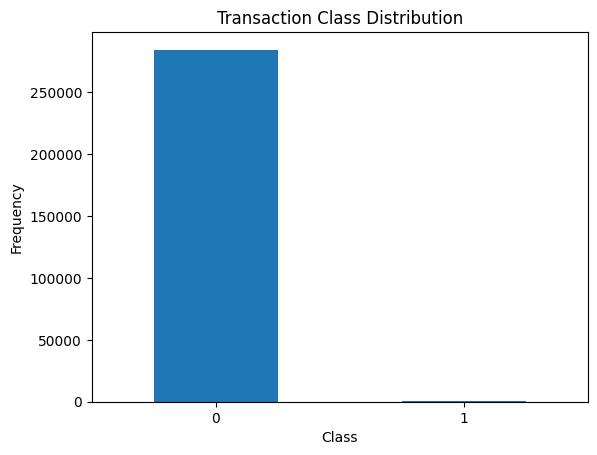

In [10]:
#Countplot Transaction Class Distribution
count_classes = pd.value_counts(df['Class'], sort = True)
count_classes.plot(kind = 'bar', rot=0)
plt.title("Transaction Class Distribution")
plt.xlabel("Class")
plt.ylabel("Frequency")

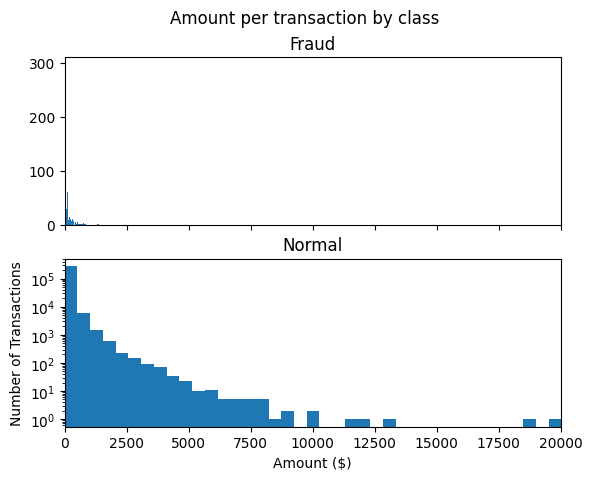

In [11]:
#Barplot of Amount per transaction by class
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
f.suptitle('Amount per transaction by class')
bins = 50
ax1.hist(Fraudulent.Amount, bins = bins)
ax1.set_title('Fraud')
ax2.hist(Normal.Amount, bins = bins)
ax2.set_title('Normal')
plt.xlabel('Amount ($)')
plt.ylabel('Number of Transactions')
plt.xlim((0, 20000))
plt.yscale('log')
plt.show();

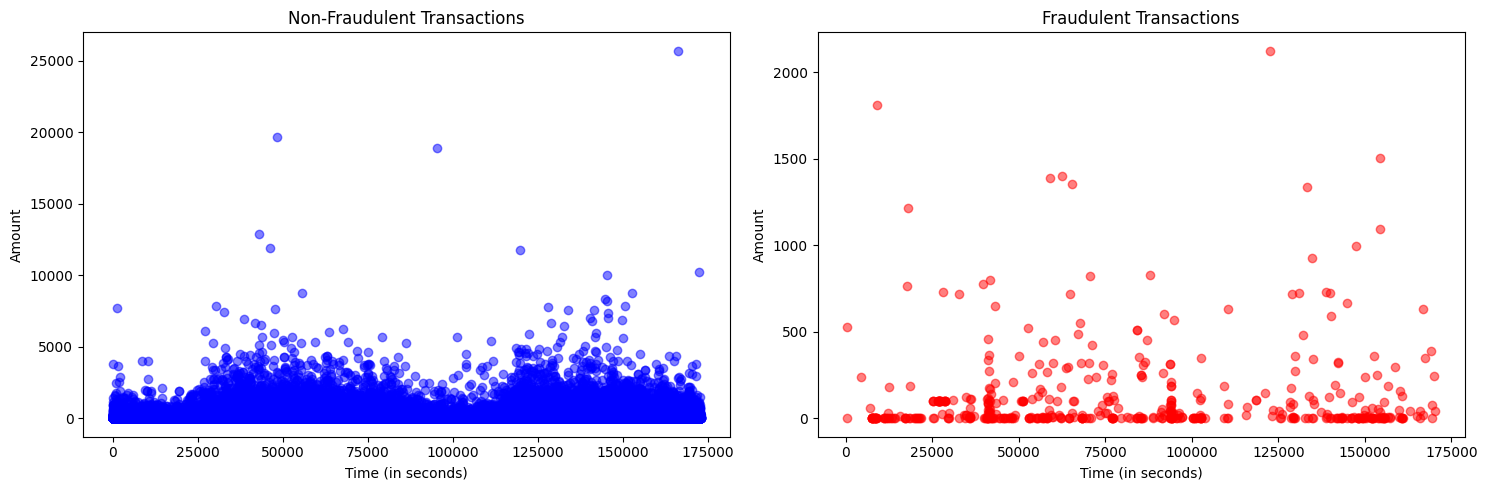

In [12]:
#Scatterplot between Amount of Transactions by class
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.scatter(Normal['Time'], Normal['Amount'], alpha=0.5, color='blue', label='Non-Fraudulent')
plt.title('Non-Fraudulent Transactions')
plt.xlabel('Time (in seconds)')
plt.ylabel('Amount')

plt.subplot(1, 2, 2)
plt.scatter(Fraudulent['Time'], Fraudulent['Amount'], alpha=0.5, color='red', label='Fraudulent')
plt.title('Fraudulent Transactions')
plt.xlabel('Time (in seconds)')
plt.ylabel('Amount')

plt.tight_layout()
plt.show()


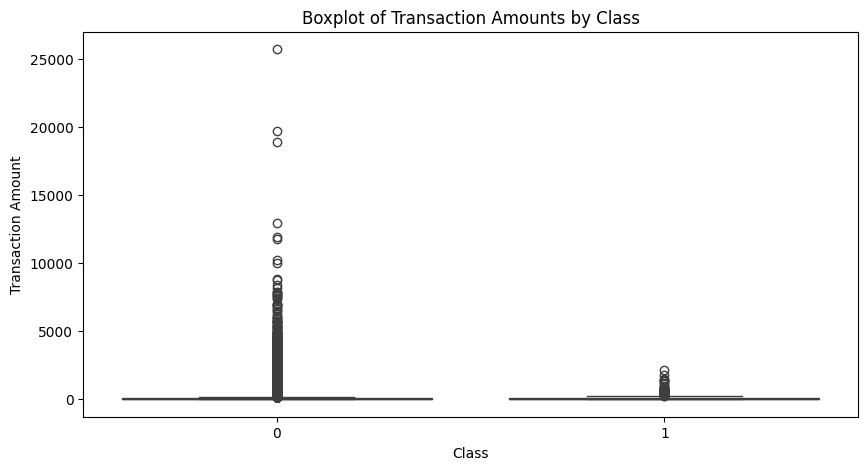

In [13]:
#Boxplot of Transaction Amounts by Class
plt.figure(figsize=(10, 5))
sns.boxplot(x="Class", y="Amount", data=df)
plt.title('Boxplot of Transaction Amounts by Class')
plt.xlabel('Class')
plt.ylabel('Transaction Amount')
plt.show()


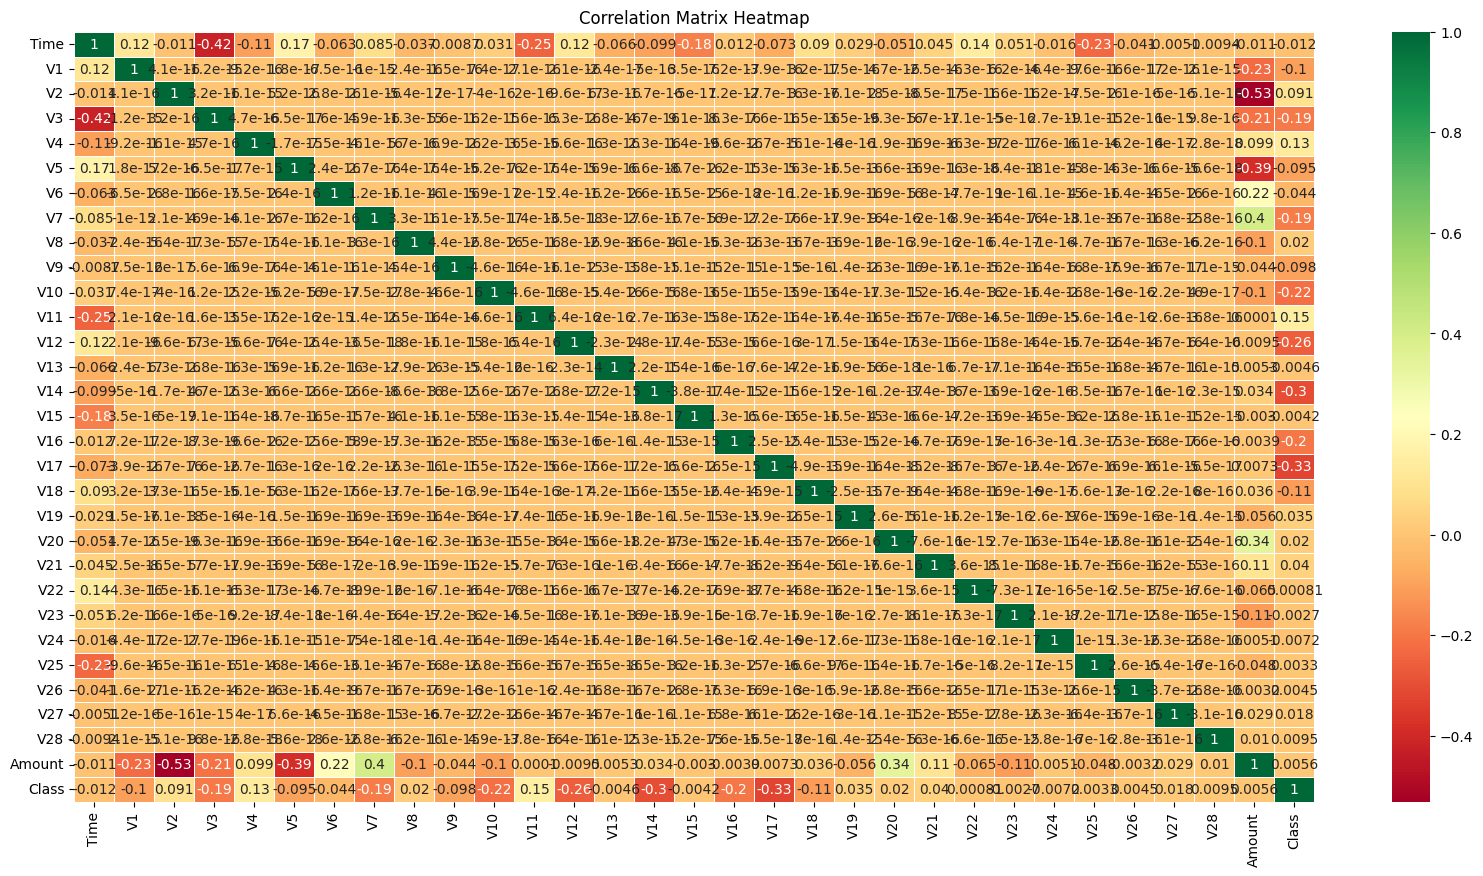

In [14]:
# Correlation matrix
corr_matrix = df.corr()

plt.figure(figsize=(20, 10))
sns.heatmap(corr_matrix, annot=True, cmap='RdYlGn', linewidths=0.5)
plt.title("Correlation Matrix Heatmap")
plt.show()


In [15]:
#Create independent and Dependent Features
columns = df.columns.tolist()

columns = [c for c in columns if c not in ["Class"]]
target = "Class"
state = np.random.RandomState(42)
X = df[columns]
Y = df[target]
X_outliers = state.uniform(low=0, high=1, size=(X.shape[0], X.shape[1]))

print(X.shape)
print(Y.shape)

(284807, 30)
(284807,)


In [16]:
# Splitting the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

print(f'Training set shape: {X_train.shape}, Testing set shape: {X_test.shape}')


Training set shape: (227845, 30), Testing set shape: (56962, 30)


Logistic Regression

In [17]:
log_model = LogisticRegression(max_iter=1000, random_state=42)
log_model.fit(X_train, Y_train)

Y_pred_log = log_model.predict(X_test)

print("Logistic Regression Accuracy:", accuracy_score(Y_test, Y_pred_log))
print("Classification Report:\n", classification_report(Y_test, Y_pred_log))
print("Confusion Matrix:\n", confusion_matrix(Y_test, Y_pred_log))


C:\Users\Nikhil G\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression Accuracy: 0.9989115550718023
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.78      0.51      0.62        98

    accuracy                           1.00     56962
   macro avg       0.89      0.75      0.81     56962
weighted avg       1.00      1.00      1.00     56962

Confusion Matrix:
 [[56850    14]
 [   48    50]]


Random Forest Classifier

In [18]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, Y_train)

Y_pred_rf = rf_model.predict(X_test)

print("Random Forest Accuracy:", accuracy_score(Y_test, Y_pred_rf))
print("Classification Report:\n", classification_report(Y_test, Y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(Y_test, Y_pred_rf))


Random Forest Accuracy: 0.9995611109160493
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.97      0.77      0.86        98

    accuracy                           1.00     56962
   macro avg       0.99      0.88      0.93     56962
weighted avg       1.00      1.00      1.00     56962

Confusion Matrix:
 [[56862     2]
 [   23    75]]


XgBoost Classifierr

In [19]:
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train, Y_train)

Y_pred_xgb = xgb_model.predict(X_test)

print("XGBoost Accuracy:", accuracy_score(Y_test, Y_pred_xgb))
print("Classification Report:\n", classification_report(Y_test, Y_pred_xgb))
print("Confusion Matrix:\n", confusion_matrix(Y_test, Y_pred_xgb))


C:\Users\Nikhil G\AppData\Roaming\Python\Python312\site-packages\xgboost\core.py:158: UserWarning: [23:19:00] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Accuracy: 0.9995611109160493
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.96      0.78      0.86        98

    accuracy                           1.00     56962
   macro avg       0.98      0.89      0.93     56962
weighted avg       1.00      1.00      1.00     56962

Confusion Matrix:
 [[56861     3]
 [   22    76]]


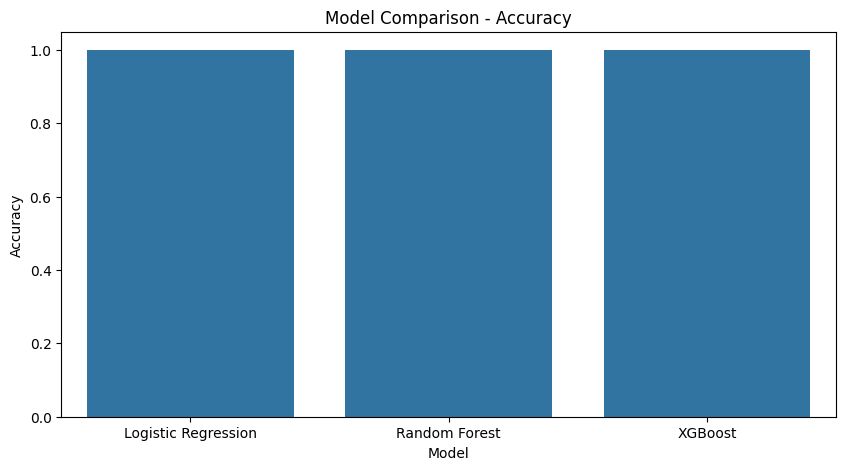

In [20]:
models = ['Logistic Regression', 'Random Forest', 'XGBoost']
accuracies = [accuracy_score(Y_test, Y_pred_log),
              accuracy_score(Y_test, Y_pred_rf),
              accuracy_score(Y_test, Y_pred_xgb)]

plt.figure(figsize=(10, 5))
sns.barplot(x=models, y=accuracies)
plt.title("Model Comparison - Accuracy")
plt.xlabel("Model")
plt.ylabel("Accuracy")
plt.show()


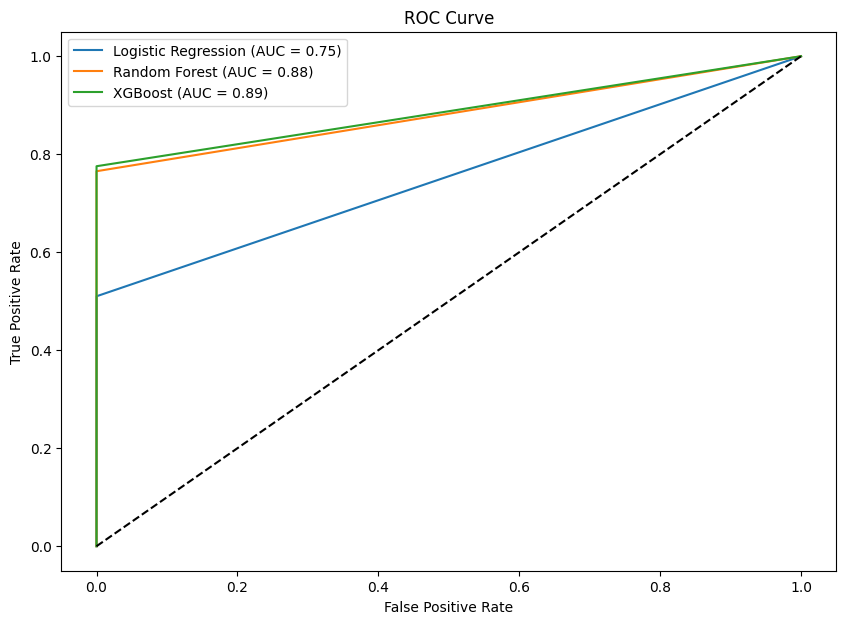

In [21]:
log_fpr, log_tpr, _ = roc_curve(Y_test, Y_pred_log)
rf_fpr, rf_tpr, _ = roc_curve(Y_test, Y_pred_rf)
xgb_fpr, xgb_tpr, _ = roc_curve(Y_test, Y_pred_xgb)

plt.figure(figsize=(10, 7))

plt.plot(log_fpr, log_tpr, label=f'Logistic Regression (AUC = {roc_auc_score(Y_test, Y_pred_log):.2f})')
plt.plot(rf_fpr, rf_tpr, label=f'Random Forest (AUC = {roc_auc_score(Y_test, Y_pred_rf):.2f})')
plt.plot(xgb_fpr, xgb_tpr, label=f'XGBoost (AUC = {roc_auc_score(Y_test, Y_pred_xgb):.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='best')
plt.show()


In [24]:
# Logistic Regression Metrics
log_accuracy = accuracy_score(Y_test, Y_pred_log)
log_precision = precision_score(Y_test, Y_pred_log)
log_recall = recall_score(Y_test, Y_pred_log)

# Random Forest Metrics
rf_accuracy = accuracy_score(Y_test, Y_pred_rf)
rf_precision = precision_score(Y_test, Y_pred_rf)
rf_recall = recall_score(Y_test, Y_pred_rf)

# XGBoost Metrics
xgb_accuracy = accuracy_score(Y_test, Y_pred_xgb)
xgb_precision = precision_score(Y_test, Y_pred_xgb)
xgb_recall = recall_score(Y_test, Y_pred_xgb)

# Print all metrics
print("Logistic Regression:")
print(f"Accuracy: {log_accuracy:.4f}, Precision: {log_precision:.4f}, Recall: {log_recall:.4f}")

print("\nRandom Forest:")
print(f"Accuracy: {rf_accuracy:.4f}, Precision: {rf_precision:.4f}, Recall: {rf_recall:.4f}")

print("\nXGBoost:")
print(f"Accuracy: {xgb_accuracy:.4f}, Precision: {xgb_precision:.4f}, Recall: {xgb_recall:.4f}")


Logistic Regression:
Accuracy: 0.9989, Precision: 0.7812, Recall: 0.5102

Random Forest:
Accuracy: 0.9996, Precision: 0.9740, Recall: 0.7653

XGBoost:
Accuracy: 0.9996, Precision: 0.9620, Recall: 0.7755


### Observations

-- Logistic Regression performed reasonably well but showed limitations in detecting fraudulent transactions, evident from a lower recall rate. This indicates that while it correctly identifies many non-fraudulent transactions, it misses a significant portion of fraudulent cases.

-- Random Forest demonstrated an improvement over Logistic Regression with higher precision and recall. It effectively reduced false positives (incorrectly classifying legitimate transactions as fraudulent) and improved the detection of fraudulent transactions. This model offers a better balance between precision and recall, making it more reliable for fraud detection.

-- XGBoost achieved the highest accuracy and exhibited superior precision and recall compared to both Logistic Regression and Random Forest. The increased recall indicates that XGBoost is better at identifying fraudulent transactions without significantly increasing false positives.


In summary, XGBoost is the best-performing model among the ones evaluated for detecting credit card fraud. Its superior performance in precision and recall makes it a robust choice for real-world applications where accurately identifying fraudulent transactions is crucial.